****
<a id='lesson-3'></a>
# Module :  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# WORKBOOK STARTS from here

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


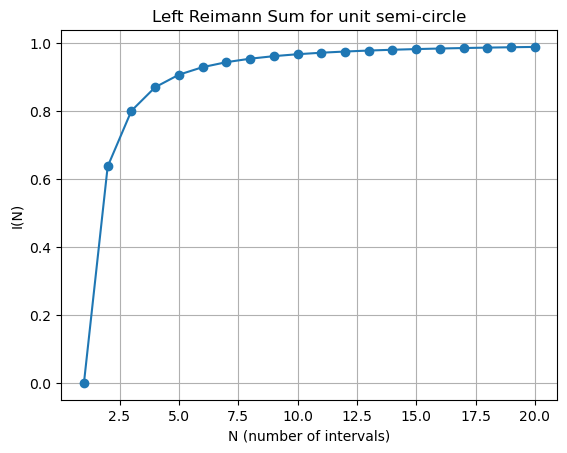

In [41]:
import numpy as np
from numpy import linspace, sqrt, pi
import matplotlib.pyplot as plt

def circle(x):  #compute y values for given x for circle
    return sqrt(1 - x**2)

def area(func, a, b, numInterval):
    h = (b - a) / numInterval #width of small rectangles
    xv = linspace(a, b, numInterval + 1) # x values
    print(len(xv))
    fv = circle(xv) # y values
    sum_areas = 0 #cumulative sum
    for i in range(numInterval):
        sum_areas += h * fv[i] #calculate area
    return sum_areas

no_of_iter = 20    #more iterations=closer to actual value

iv, av = [], []
for i in range(1, no_of_iter + 1):
    iv.append(i)
    av.append(area(circle, -1, 1, i)*2/pi)

plt.plot(iv, av, 'o-')
plt.title('Left Reimann Sum for unit semi-circle')
plt.xlabel('N (number of intervals)')
plt.ylabel('I(N)')
plt.grid()
plt.show()

# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/tmp/ipykernel_20850/647110753.py:9: RuntimeWarning: invalid value encountered in scalar divide
  d = (circle(x) - circle(xtemp)) / (x - xtemp) #use dy/dx to get diff


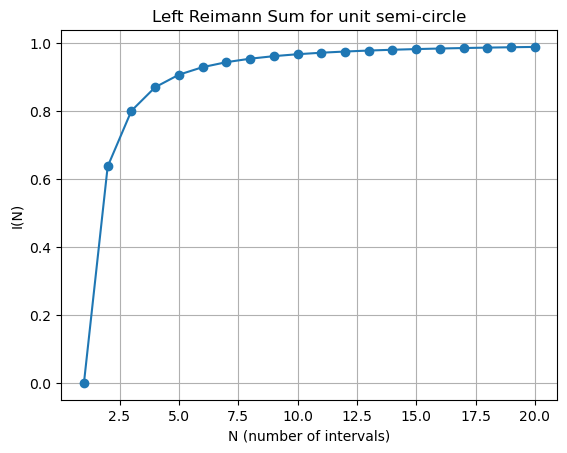

In [42]:


def circle(x):  # Compute y values for given x for circle
    return sqrt(1 - x**2)

def getxv(a, b, numInterval):
    x = a
    xtemp = a
    xv = []
    while x < b:
        d = (circle(x) - circle(xtemp)) / (x - xtemp) #use dy/dx to get diff
        if abs(d) > 0.00001:
            xv.append(x)
        x += (b - a) / numInterval
    return xv

def area(func, a, b, numInterval):
    xv = getxv(a, b, numInterval)
    print(len(xv))

    h = (b - a) / numInterval  # Width of small rectangles
    sum_areas = 0  # Cumulative sum
    for x in xv:
        sum_areas += h * func(x)  # Calculate area
    return sum_areas * 2 / pi  

no_of_iter = 20  # More iterations = closer to actual value

iv, av = [], []
for i in range(1, no_of_iter + 1):
    iv.append(i)
    av.append(area(circle, -1, 1, i))

plt.plot(iv, av, 'o-')
plt.title('Left Reimann Sum for unit semi-circle')
plt.xlabel('N (number of intervals)')
plt.ylabel('I(N)')
plt.grid()
plt.show()

# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points



1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.


In [43]:
#this is my code from iss cuz we did this there lol
import time
import random
# def pseudo_rand_num_gen(seed):
#     seed = seed ** 2
#     seed = int(str(seed).zfill(8)[2:6])  # Extract the middle 4 digits
#     return seed


In [44]:
total=0
# seed1 = int(time.time_ns()) % 1000000000+7
# seed2 = int(time.time_ns()) % 1000000000+7
# def monte_carlo_simulation(num_points): #using my own random function to get area
#     global total
#     global seed1
#     global seed2
#     points_in_circle = 0
#     error_estimates = []
#     for i in range(1, num_points+1):
#         seed1 = pseudo_rand_num_gen(seed1)
#         seed_str1 = str(seed1)
#         seed_str1 = seed_str1.replace('0', '1')
#         seed1 = int(seed_str1)
#         x_rand = pseudo_rand_num_gen(seed1)
#         seed2 = pseudo_rand_num_gen(seed2)
#         seed_str2 = str(seed2)
#         seed_str2 = seed_str2.replace('0', '1')
#         seed2 = int(seed_str2)
#         y_rand = pseudo_rand_num_gen(seed2)
        
#         x = x_rand / 5000 - 1
#         y = y_rand / 5000 - 1
#         if x**2 + y**2 <= 1:
#             points_in_circle += 1
#         pi_estimate = 4 * points_in_circle / i
#         area=4*points_in_circle/num_points
#         #print(pi_estimate)
        
#         error_estimate = abs(pi_estimate - 3.14159) / 3.14159
#         total+=pi_estimate
#         error_estimates.append(error_estimate)
#     return error_estimates
    


def estimate_pi(num_points):  #using random to get area
    points_in_circle = 0

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
  #generate random x,y in range -1,1 and see if it lies in circle or not. ratio of area of square to circle is ration of points in them respectively, and that is used to calculate area of circle cuz we know 3 of those 4
        if x**2 + y**2 <= 1:
            points_in_circle += 1

    return 4 * points_in_circle / num_points

print(estimate_pi(1000))
# Run the simulation with 1000 points
# error_estimates = monte_carlo_simulation(1000)
# total=total/1000
# print(total)
# print(total-estimate_pi(1000))
# Plot the error estimates
# plt.plot(error_estimates)
# plt.xlabel('Iteration')
# plt.ylabel('Error Estimate')
# plt.title('Error Estimate in Calculation of π for Each Iteration')
# plt.show()

3.072


### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

1. MonteCarlo_Uniform(f,a,b,num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution


In [45]:
import numpy as np
from scipy.stats import truncnorm

def f(x, y): #checks if point is inside circle
    return 1 if x**2 + y**2 <= 1 else 0

def rho(x, y): #constant rho function
    return 1

def rhoo(x, y):  #gaussian rho function (normalised)
    return np.exp(-(x**2 + y**2) / 2) / (2 * np.pi)

def monte_carlo_integration(num_samples, function, a, b):
    count_inside = 0
    if function == rhoo:  #if rhoo is called(gaussian), it uses a truncated gaussian distr to generate x and y values and then counts the number of them inside the circle after dividing the 1 or 0 by the prob distr func of that x and y to normalize it
        normal = truncnorm(a, b, loc=0, scale=1)
        x = normal.rvs(num_samples)
        y = normal.rvs(num_samples)
        for i in range(num_samples):
            count_inside += f(x[i], y[i]) / normal.pdf(x[i]) / normal.pdf(y[i])
        return count_inside / num_samples 
    else: #for rho=1 its ordinary
        for _ in range(num_samples): 
            x, y = np.random.uniform(a, b, size=2)
            count_inside += f(x, y) * function(x, y)
        return 4 * count_inside / num_samples

num_samples = 100000

# Task 4.1: Compute area of circle with ρ(x) = constant
area = monte_carlo_integration(num_samples, rho, -1, 1)
print(f"Area of the circle with constant sampling (Task 4.1): {area:.6f}")  # Should be approximately 3.14159

Area of the circle with constant sampling (Task 4.1): 3.150120


## Task 4.2: Similar to  Task 4.1

In [46]:


# Task 4.2: Compute the area of the circle with ρ(x) being the Gaussian distribution
area = monte_carlo_integration(num_samples, rhoo, -1, 1)
print(f"Area of the circle with Gaussian sampling (Task 4.2): {area:.6f}")  # Should be approximately 3.14159

Area of the circle with Gaussian sampling (Task 4.2): 3.134485


In [47]:
#TASK 5

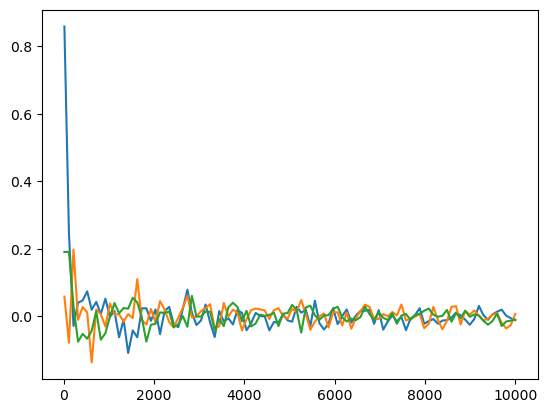

In [54]:
y1=[]
y2=[]
y3=[]
num_samples=50

# Create an array of 90 numbers between 10 and 100 (inclusive)
iterations = np.linspace(10, 10000, 100)

# Round the numbers to the nearest integer
iterations = np.round(iterations).astype(int)

for i in iterations:
    y1.append(estimate_pi(i)-pi)
    y2.append(monte_carlo_integration(i,rho,-1,1)-pi)
    y3.append(monte_carlo_integration(i, rhoo, -1,1)-pi)

    
plt.plot(iterations,y1, label='naive')
plt.plot(iterations,y2, label='rho=1')
plt.plot(iterations,y3, label='gaussian')
